<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [6]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv('survey_data_clean.csv')

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Unknown,Unknown,86155.287263,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.000000,Unknown,Unknown,86155.287263,Unknown
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Easy,86155.287263,Unknown
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too long,Easy,86155.287263,Unknown
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too short,Easy,86155.287263,Unknown


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


C:\Users\serge\AppData\Local\Temp\ipykernel_2764\4279685393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Industry', palette='pastel')


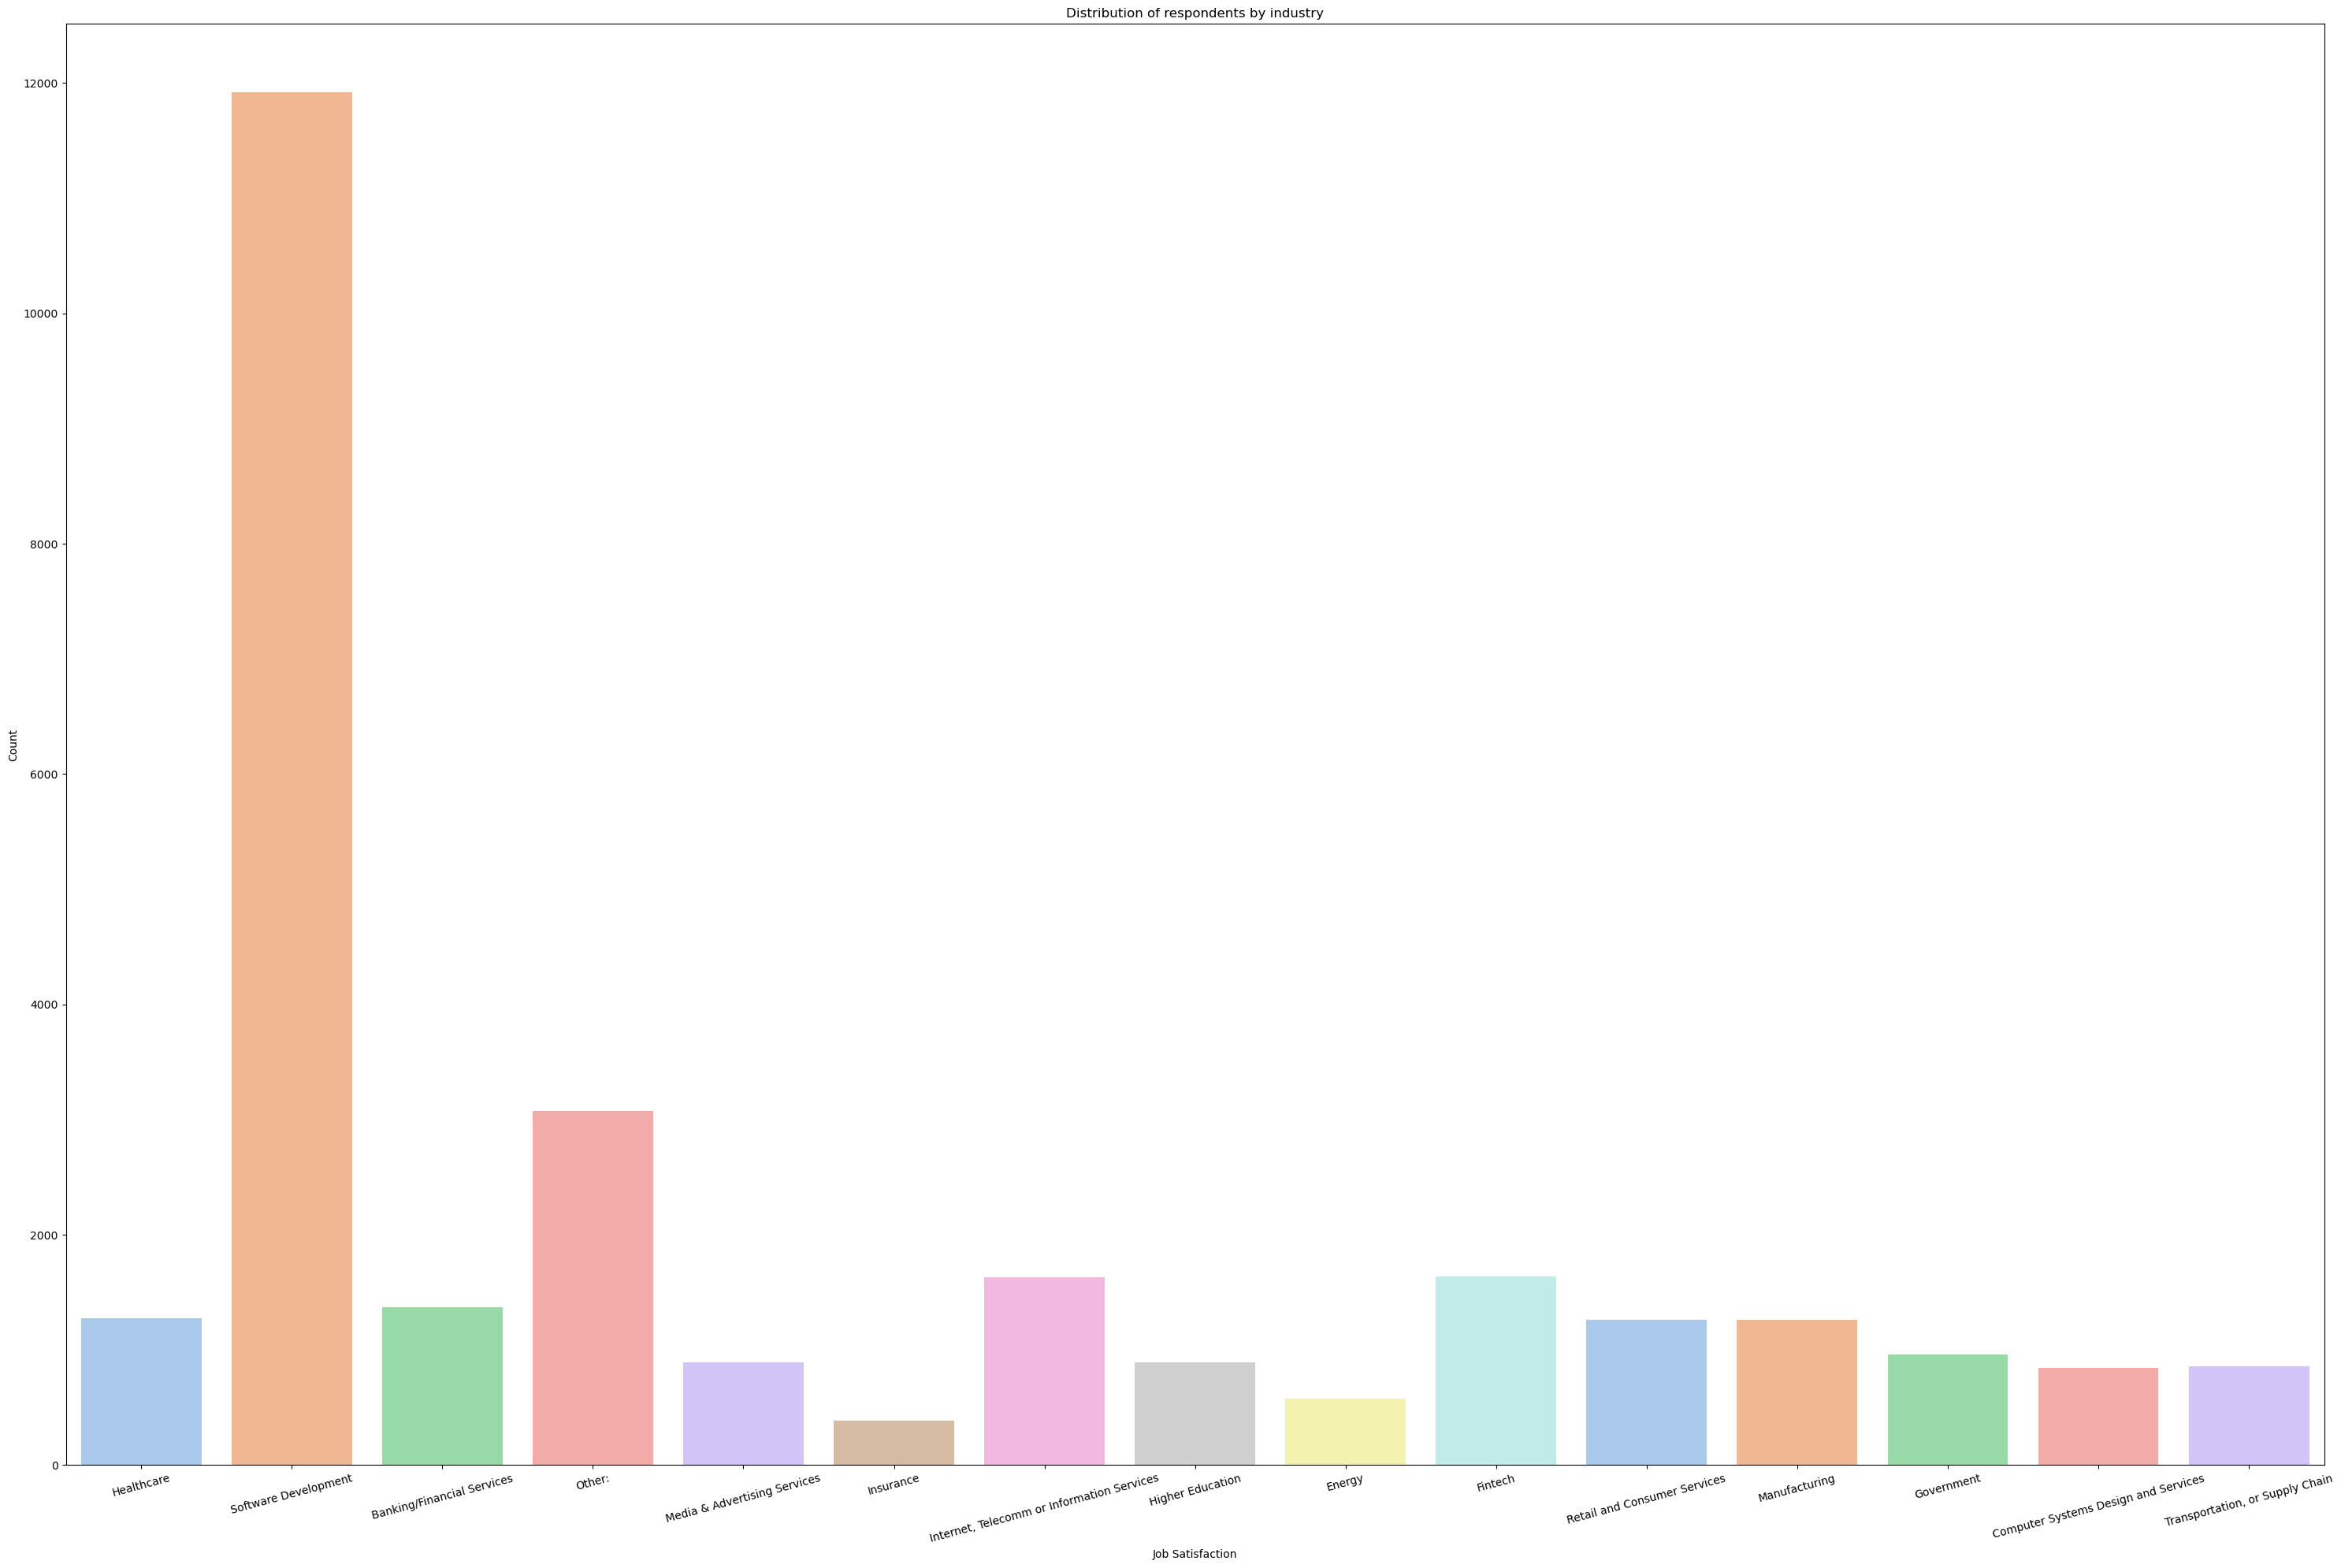

In [9]:
##Write your code here
# df.columns.tolist()

plt.figure(figsize=(30, 20))
sns.countplot(data=df, x='Industry', palette='pastel')

# Add labels and title
plt.title('Distribution of respondents by industry')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [12]:
##Write your code here
df['ConvertedCompYearly'].describe()

count    6.543700e+04
mean     8.615529e+04
std      1.117614e+05
min      1.000000e+00
25%      8.615529e+04
50%      8.615529e+04
75%      8.615529e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [13]:
ConvertedCompYearly_mean = df['ConvertedCompYearly'].mean()
ConvertedCompYearly_mean

86155.28726264133

In [14]:
ConvertedCompYearly_median = df['ConvertedCompYearly'].median()
ConvertedCompYearly_median

86155.28726264134

In [15]:
ConvertedCompYearly_std = df['ConvertedCompYearly'].std()
ConvertedCompYearly_std

111761.35725234024

In [16]:
# Define threshold (e.g., 3 standard deviations)
threshold = ConvertedCompYearly_mean  + 3 * ConvertedCompYearly_std

# Identify outliers
outliers = df[df['ConvertedCompYearly'] > threshold]

print("Threshold:", threshold)
print("Outliers:")
outliers.head()

Threshold: 421439.359019662
Outliers:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,40.0,20.0,0.0,30.0,10.0,0.000000,Appropriate in length,Easy,650000.0,6.0
594,595,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,10.0,10.0,20.0,20.0,5.0,0.000000,Appropriate in length,Easy,432000.0,8.0
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,10.0,0.0,5.0,0.0,0.000000,Appropriate in length,Neither easy nor difficult,1000000.0,8.0
920,921,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,15.0,25.0,30.0,0.0,0.000000,Appropriate in length,Neither easy nor difficult,500000.0,7.0
1081,1082,I am a developer by profession,55-64 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;How-to ...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Neither easy nor difficult,500000.0,Unknown


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [19]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['CompTotal'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 29112


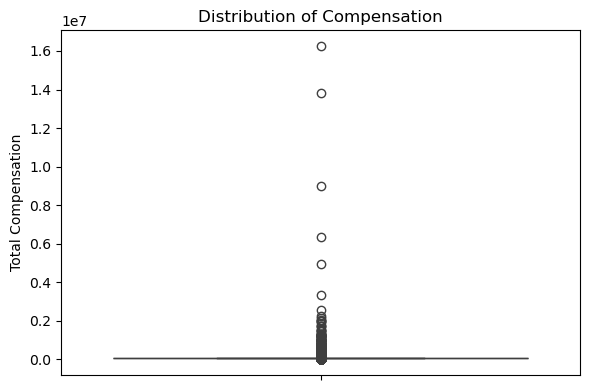

In [21]:
# Basic box plot for just one variable
plt.figure(figsize=(6, 4))
sns.boxplot(y='ConvertedCompYearly', data=df)  # y-axis only since there's no category

# Add labels and title
plt.title('Distribution of Compensation')
plt.ylabel('Total Compensation')

# Show plot
plt.tight_layout()
plt.show()

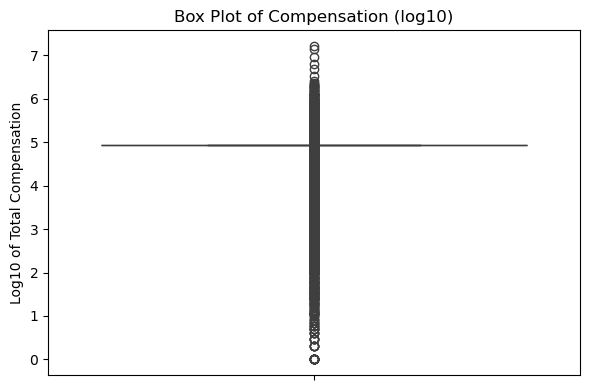

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Optional: log-transform to reduce skewness
df['CompTotal_log'] = df['ConvertedCompYearly'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

plt.figure(figsize=(6, 4))
sns.boxplot(y='CompTotal_log', data=df)

plt.title('Box Plot of Compensation (log10)')
plt.ylabel('Log10 of Total Compensation')
plt.tight_layout()
plt.show()

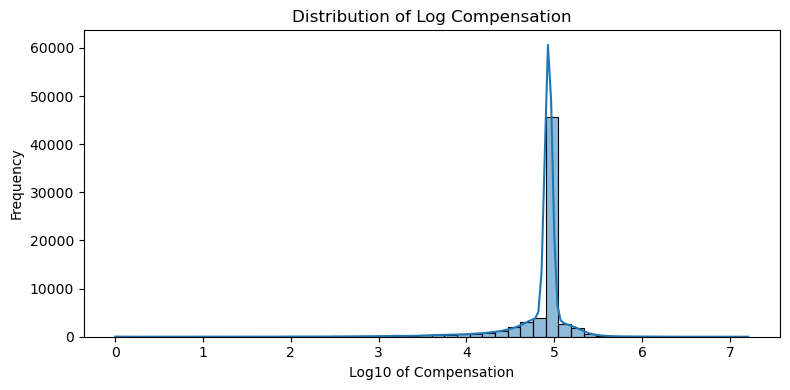

In [26]:
# Use a histogram to see where the values are clustered:

plt.figure(figsize=(8, 4))
sns.histplot(df['CompTotal_log'].dropna(), bins=50, kde=True)
plt.title("Distribution of Log Compensation")
plt.xlabel("Log10 of Compensation")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [45]:
##Write your code here

Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
No_outliers = df[(df['ConvertedCompYearly'] > lower_bound) | (df['ConvertedCompYearly'] < upper_bound)]
print(f"No Outliers: {len(outliers)}")
No_outliers.shape

No Outliers: 29112


(23435, 115)

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [89]:
##Write your code here
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [91]:
# Maping the Age column to numeric values

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
    
}

df['AgeNumeric'] = df['Age'].map(age_map)
# df['AgeNumeric'].value_counts()

# Confirm numeric type
# df['AgeNumeric'] = pd.to_numeric(df['AgeNumeric'], errors='coerce')

Compute correlations

Now that AgeNumeric is numeric, you can compute correlation coefficients with other numeric columns, like ConvertedCompYearly, YearsCodePro, JobSatisfaction, etc.

Use .corr():

In [94]:
print(df[['Age', 'AgeNumeric']].head())

                  Age  AgeNumeric
0  Under 18 years old        16.0
1     35-44 years old        40.0
2     45-54 years old        50.0
3     18-24 years old        20.0
4     18-24 years old        20.0


In [96]:
print(df['AgeNumeric'].dtype)

float64


Let's say you want to compute correlations of AgeNumeric with these specific columns:


In [104]:
# Let's say you want to compute correlations of AgeNumeric with these specific columns:
target_cols = ['ConvertedCompYearly', 'YearsCodePro', 'JobSat']
# Ensure AgeNumeric and target columns are numeric
df_subset = df[['AgeNumeric'] + target_cols].apply(pd.to_numeric, errors='coerce')
# Compute correlations
correlations = df_subset.corr()['AgeNumeric'].drop('AgeNumeric')  # Drop self-correlation
print(correlations)

ConvertedCompYearly    0.064709
YearsCodePro           0.824866
JobSat                 0.069869
Name: AgeNumeric, dtype: float64


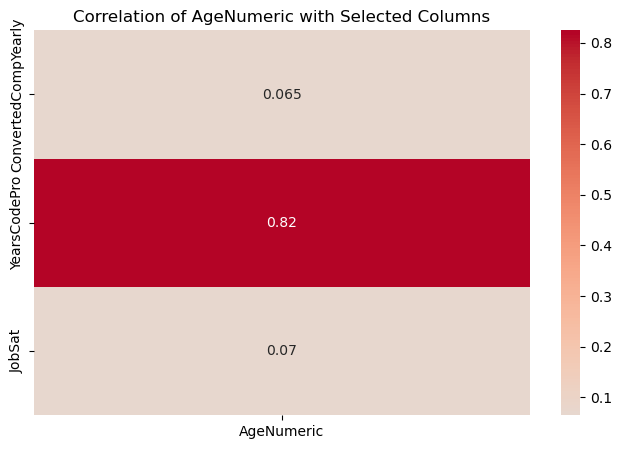

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the relevant columns
target_cols = ['ConvertedCompYearly', 'YearsCodePro', 'JobSat']
df_subset = df[['AgeNumeric'] + target_cols].apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
correlation_matrix = df_subset.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix[['AgeNumeric']].drop('AgeNumeric'), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of AgeNumeric with Selected Columns')
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
